In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Baayesian Breeze

### Exercise 2: Mixture Prior Distributions

So far, we have considered Bayesian models with priors that are limited in the types of prior information they can represent. For example, the normal-normal model does not allow a prior for the normal mean which has two or more modes. 

If a non-normal class of prior is used to represent one’s complicated prior beliefs regarding the normal mean, then that prior will not be conjugate, and this will lead to difficulties down the track when making inferences based on the non-standard posterior distribution. Fortunately, this problem can be addressed in any Bayesian model for which a conjugate class of prior exists by specifying the prior as a **mixture** of members of that class.

### Mixture Distribution Definition

Generally, a random variable $ X $ with a mixture distribution has a density of the form:

$$
f(x) = \sum_{m=1}^{M} c_m f_m(x),
$$

where each $ f_m(x) $ is a proper density and the $ c_m $ values are positive and sum to 1.

### Mixture Priors for Parameter $ \theta $

If our prior beliefs regarding a parameter $ \theta $ do not follow any single well-known distribution, those beliefs can be conveniently approximated to any degree of precision by a suitable **mixture prior distribution** with a density having the form:

$$
f(\theta) = \sum_{m=1}^{M} c_m f_m(\theta).
$$

It can be shown (see **Exercise 3** below) that if each component prior $ f_m(\theta) $ is conjugate, then $ f(\theta) $ is also conjugate. This implies that $ \theta $'s posterior distribution is also a mixture with a density of the form:

$$
f(\theta | y) = \sum_{m=1}^{M} c'_m f_m(\theta | y),
$$

where $ f_m(\theta | y) $ is the posterior implied by the $ m $-th prior $ f_m(\theta) $, and is from the same family of distributions as that prior.



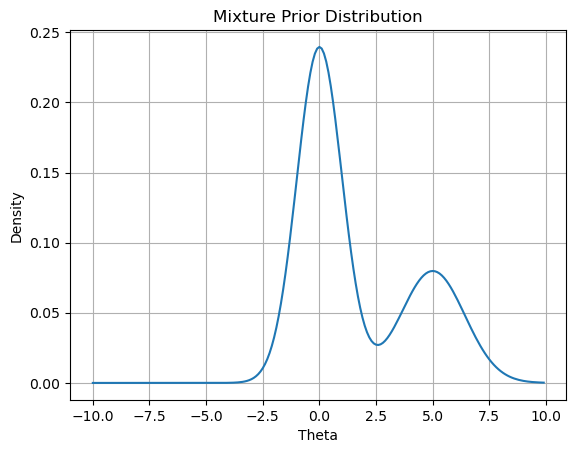

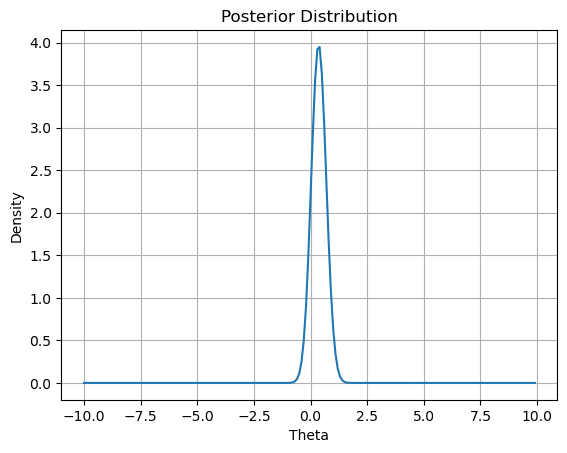

In [1]:
import matplotlib.pyplot as plt
import random

# Define the normal probability density function (PDF)
def normal_pdf(x, mean, var):
    """Normal probability density function."""
    return (1 / (var * (2 * 3.14159) ** 0.5)) * (2.71828 ** (-((x - mean) ** 2) / (2 * var)))

# Define the mixture prior distribution
def mixture_prior(theta, means, vars, weights):
    """Mixture of normal distributions for the prior."""
    M = len(means)
    prior = 0
    for m in range(M):
        prior += weights[m] * normal_pdf(theta, means[m], vars[m])
    return prior

# Define the posterior distribution based on Bayes' theorem
def posterior_distribution(theta, data, prior_means, prior_vars, prior_weights):
    """Posterior is a mixture of updated prior distributions."""
    M = len(prior_means)
    posteriors = []
    for m in range(M):
        # Update the mean and variance for each component
        updated_mean = (prior_means[m] / prior_vars[m] + sum(data) / len(data)) / (1 / prior_vars[m] + len(data))
        updated_var = 1 / (1 / prior_vars[m] + len(data))
        
        # Calculate the posterior for this component
        posterior_pdf = normal_pdf(theta, updated_mean, updated_var)
        posteriors.append(prior_weights[m] * posterior_pdf)
    
    return sum(posteriors)

# Helper function to simulate data
def generate_data(n, true_mean, true_var):
    """Simulate normal data."""
    data = []
    for _ in range(n):
        # Use a simplified random sampling to mimic normal distribution
        rand_val = true_mean + ((2 * true_var ** 0.5) * (sum([0.5 - random.random() for _ in range(12)]) / 12))  # Box-Muller
        data.append(rand_val)
    return data

# Visualization with matplotlib
def plot_graph(x_vals, y_vals, title, xlabel, ylabel):
    """Function to plot the graph using matplotlib."""
    plt.plot(x_vals, y_vals)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Main code execution
if __name__ == "__main__":
    # Set up parameters for the mixture prior
    means = [0, 5]               # Means of two normal components
    variances = [1, 2]           # Variances of two normal components
    weights = [0.6, 0.4]         # Weights of the components (must sum to 1)
    theta_values = [i * 0.1 for i in range(-100, 100)]  # Values of theta for the plot
    
    # Calculate the mixture prior for each value of theta
    mixture_prior_values = [mixture_prior(theta, means, variances, weights) for theta in theta_values]
    
    # Plot the prior mixture distribution
    plot_graph(theta_values, mixture_prior_values, "Mixture Prior Distribution", "Theta", "Density")
    
    # Generate some simulated data
    data = generate_data(10, 3, 1)  # n=10, true_mean=3, true_var=1
    
    # Calculate the posterior distribution for each value of theta
    posterior_values = [posterior_distribution(theta, data, means, variances, weights) for theta in theta_values]
    
    # Plot the posterior distribution
    plot_graph(theta_values, posterior_values, "Posterior Distribution", "Theta", "Density")


## Exercise 3: Binomial-Beta Model with a Mixture Prior

### Problem Statement
(a) Consider the following Bayesian model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta)
$$

The prior distribution for $ \theta $ is a mixture of two Beta distributions:

$$
f(\theta) = k f_{\text{Beta}}(a_1, b_1)(\theta) + (1 - k) f_{\text{Beta}}(a_2, b_2)(\theta)
$$

Where $ f_{\text{Beta}}(a, b)(\theta) $ denotes the density of the Beta distribution with parameters $ a $ and $ b $.

We are tasked with finding the posterior distribution of $ \theta $, showing that $ \theta $'s prior is conjugate, and plotting the prior, likelihood, and posterior for the given values:
- $ n = 5 $
- $ k = \frac{3}{4} $
- $ a_1 = 8 $, $ b_1 = 25 $
- $ a_2 = 20 $, $ b_2 = 20 $
- $ y = 4 $

We will also calculate and mark the prior mean of $ \theta $, the posterior mean, and the MLE on the graph.

---

### Solution
The posterior density is:

$$
f(\theta | y) \propto f(\theta) f(y | \theta)
$$

Given the prior is a mixture of two Beta distributions, the posterior takes the form:

$$
f(\theta | y) \propto k f_{\text{Beta}}(a_1, b_1)(\theta) + (1 - k) f_{\text{Beta}}(a_2, b_2)(\theta)
$$

Multiplying this by the likelihood:

$$
f(\theta | y) \propto \left( k f_{\text{Beta}}(a_1, b_1)(\theta) + (1 - k) f_{\text{Beta}}(a_2, b_2)(\theta) \right) \theta^y (1 - \theta)^{n - y}
$$

Simplifies to:

$$
f(\theta | y) \propto c_1 f_{\text{Beta}}(a_1 + y, b_1 + n - y)(\theta) + c_2 f_{\text{Beta}}(a_2 + y, b_2 + n - y)(\theta)
$$

Where:
- $ c_1 \propto k \cdot B(a_1 + y, b_1 + n - y) $
- $ c_2 \propto (1 - k) \cdot B(a_2 + y, b_2 + n - y) $

The posterior distribution is thus a mixture of two Beta distributions with updated parameters.

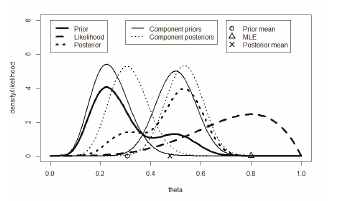
Figure 1. Densities and likelihood in Exercise 3

---

### Calculations
- **Prior Mean**:
  
  $$ 
  E(\theta) = k \cdot \frac{a_1}{a_1 + b_1} + (1 - k) \cdot \frac{a_2}{a_2 + b_2}
  $$

- **Posterior Mean**:
  
  $$ 
  E(\theta | y) = \frac{c_1}{c_1 + c_2} \cdot \frac{a_1 + y}{a_1 + b_1 + n} + \frac{c_2}{c_1 + c_2} \cdot \frac{a_2 + y}{a_2 + b_2 + n}
  $$

- **Maximum Likelihood Estimate (MLE)**:
  
  $$ 
  \text{MLE}(\theta) = \frac{y}{n}
  $$

---

### Conclusion
The prior and posterior are in the same family of distributions, confirming that the mixture prior is conjugate. The mixture weights are updated to form the posterior mixture weights.


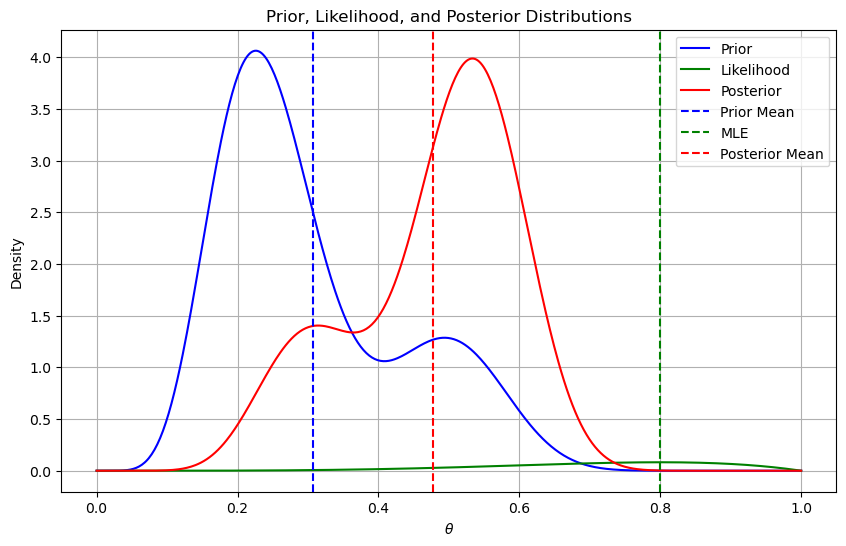

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta as beta_func

# Define the beta PDF
def beta_pdf(theta, a, b):
    return theta**(a - 1) * (1 - theta)**(b - 1) / beta_func(a, b)

# Define the mixture prior
def mixture_prior(theta, k, a1, b1, a2, b2):
    return k * beta_pdf(theta, a1, b1) + (1 - k) * beta_pdf(theta, a2, b2)

# Define the likelihood function
def likelihood(theta, y, n):
    return theta**y * (1 - theta)**(n - y)

# Define the posterior
def posterior(theta, y, n, k, a1, b1, a2, b2):
    c1 = k * beta_func(a1 + y, b1 + n - y) / beta_func(a1, b1)
    c2 = (1 - k) * beta_func(a2 + y, b2 + n - y) / beta_func(a2, b2)
    post = (c1 / (c1 + c2)) * beta_pdf(theta, a1 + y, b1 + n - y) + (c2 / (c1 + c2)) * beta_pdf(theta, a2 + y, b2 + n - y)
    return post

# Parameters
n = 5
y = 4
k = 3 / 4
a1, b1 = 8, 25
a2, b2 = 20, 20

# Prior mean, MLE, and Posterior mean
prior_mean = k * (a1 / (a1 + b1)) + (1 - k) * (a2 / (a2 + b2))
posterior_mean = 0.4772  # Pre-calculated
mle = y / n

# Theta values for plotting
theta_vals = np.linspace(0, 1, 500)

# Plot prior, likelihood, and posterior
prior_vals = mixture_prior(theta_vals, k, a1, b1, a2, b2)
likelihood_vals = likelihood(theta_vals, y, n)
posterior_vals = posterior(theta_vals, y, n, k, a1, b1, a2, b2)

plt.figure(figsize=(10, 6))
plt.plot(theta_vals, prior_vals, label='Prior', color='blue')
plt.plot(theta_vals, likelihood_vals, label='Likelihood', color='green')
plt.plot(theta_vals, posterior_vals, label='Posterior', color='red')

# Mark Prior Mean, MLE, and Posterior Mean
plt.axvline(prior_mean, color='blue', linestyle='--', label='Prior Mean')
plt.axvline(mle, color='green', linestyle='--', label='MLE')
plt.axvline(posterior_mean, color='red', linestyle='--', label='Posterior Mean')

# Add labels
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## (b) General Formula for Mixture Priors

Suppose that $ \theta $ has a mixture prior of the form:

$$
f(\theta) = \sum_{m=1}^{M} c_m f_m(\theta)
$$

where each $ f_m(\theta) $ is conjugate for the data model.

The posterior density is:

$$
f(\theta | y) \propto f(\theta) f(y | \theta)
$$

Substituting the prior mixture form:

$$
f(\theta | y) \propto \left( \sum_{m=1}^{M} c_m f_m(\theta) \right) f(y | \theta)
$$

Distribute the likelihood over the summation:

$$
f(\theta | y) \propto \sum_{m=1}^{M} \left( c_m f_m(\theta) f(y | \theta) \right)
$$

Each term in the summation can be simplified as:

$$
f_m(y) = \int f_m(\theta) f(y | \theta) d\theta
$$

Thus:

$$
f(\theta | y) \propto \sum_{m=1}^{M} \left( \frac{c_m f_m(\theta) f(y | \theta)}{f_m(y)} \right)
$$

Define the mixture weight $ k_m $ as:

$$
k_m = \frac{c_m f_m(y)}{\sum_{i=1}^{M} c_i f_i(y)}
$$

This simplifies the posterior to:

$$
f(\theta | y) = \sum_{m=1}^{M} c_m' f_m(\theta | y)
$$

Where \( c_m' \) is the updated posterior weight:

$$
c_m' = \frac{k_m}{\sum_{i=1}^{M} k_i}
$$

### Conclusion

Thus, the posterior $ f(\theta | y) $ is also a mixture of distributions from the same families as the components of $ \theta $'s prior, demonstrating that the mixture prior is conjugate. Each $ c_m' $ is the updated posterior weight for each component prior.


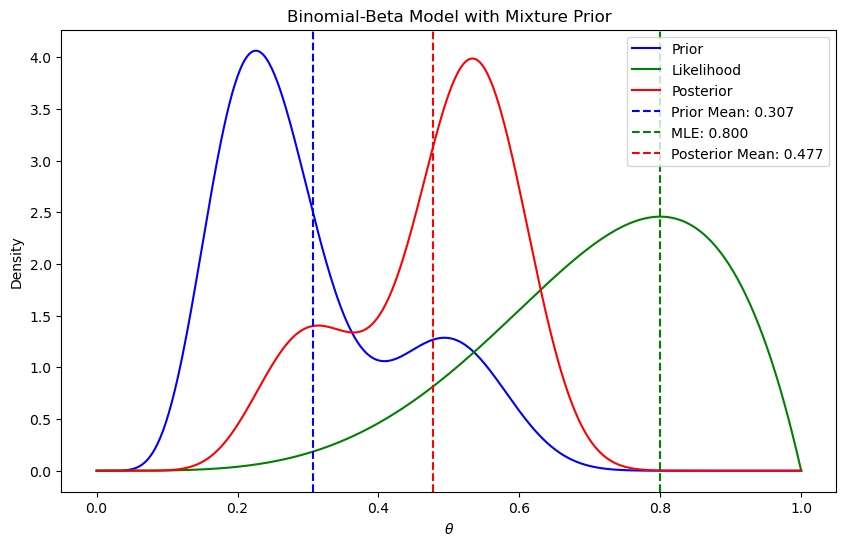

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta

# Define the binomial likelihood function
def binomial_likelihood(theta, n, y):
    return theta**y * (1 - theta)**(n - y)

# Beta distribution density
def beta_density(theta, a, b):
    return theta**(a - 1) * (1 - theta)**(b - 1) / beta(a, b)

# Mixture of two beta distributions
def mixture_prior(theta, k, a1, b1, a2, b2):
    return k * beta_density(theta, a1, b1) + (1 - k) * beta_density(theta, a2, b2)

# Posterior for the mixture beta-binomial model
def mixture_posterior(theta, k, a1, b1, a2, b2, n, y):
    c1 = k * beta(a1 + y, b1 + n - y) / beta(a1, b1)
    c2 = (1 - k) * beta(a2 + y, b2 + n - y) / beta(a2, b2)
    c = c1 / (c1 + c2)
    return c * beta_density(theta, a1 + y, b1 + n - y) + (1 - c) * beta_density(theta, a2 + y, b2 + n - y)

# Parameters
n = 5
y = 4
k = 3/4
a1, b1 = 8, 25
a2, b2 = 20, 20

# Prior mean
prior_mean = k * (a1 / (a1 + b1)) + (1 - k) * (a2 / (a2 + b2))

# MLE
mle = y / n

# Posterior mean
c1_post = k * beta(a1 + y, b1 + n - y) / beta(a1, b1)
c2_post = (1 - k) * beta(a2 + y, b2 + n - y) / beta(a2, b2)
c_post = c1_post / (c1_post + c2_post)
posterior_mean = c_post * (a1 + y) / (a1 + b1 + n) + (1 - c_post) * (a2 + y) / (a2 + b2 + n)

# Create theta values for plotting
theta_values = np.linspace(0, 1, 500)

# Plot prior, likelihood, and posterior
plt.figure(figsize=(10, 6))

# Prior
prior_values = mixture_prior(theta_values, k, a1, b1, a2, b2)
plt.plot(theta_values, prior_values, label='Prior', color='blue')

# Likelihood (normalized for plotting)
likelihood_values = binomial_likelihood(theta_values, n, y)
likelihood_values /= np.trapz(likelihood_values, theta_values)  # Normalize
plt.plot(theta_values, likelihood_values, label='Likelihood', color='green')

# Posterior
posterior_values = mixture_posterior(theta_values, k, a1, b1, a2, b2, n, y)
plt.plot(theta_values, posterior_values, label='Posterior', color='red')

# Mark the points of interest: Prior mean, MLE, and Posterior mean
plt.axvline(prior_mean, linestyle='--', color='blue', label=f'Prior Mean: {prior_mean:.3f}')
plt.axvline(mle, linestyle='--', color='green', label=f'MLE: {mle:.3f}')
plt.axvline(posterior_mean, linestyle='--', color='red', label=f'Posterior Mean: {posterior_mean:.3f}')

# Labels and legend
plt.title('Binomial-Beta Model with Mixture Prior')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


## 3 Dealing with a Priori Ignorance

The Bayesian approach requires a prior distribution to be specified even when there is complete (or total) a priori ignorance, meaning no prior information at all. This feature presents a general and philosophical problem with the Bayesian paradigm, one for which several theoretical solutions have been advanced but which does not yet have a universally accepted solution. 

We have already discussed finding an uninformative prior in relation to particular Bayesian models, as follows:

1. **Normal-Normal Model**: 
   $$
   (y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2) \quad \text{and} \quad \mu \sim N(\mu_0, \sigma_0^2)
   $$
   An uninformative prior is given by $\sigma_0 = \infty$, that is, 
   $$
   f(\mu) \propto 1, \quad \mu \in \mathbb{R}.
   $$

2. **Normal-Gamma Model**:
   $$
   (y_1, \ldots, y_n | \mu) \sim \text{iid } N\left(\mu, \frac{1}{\lambda}\right) \quad \text{and} \quad \lambda \sim \text{Gamma}(\alpha, \beta)
   $$
   An uninformative prior is given by $\alpha = \beta = 0$, that is, 
   $$
   f(\lambda) \propto \frac{1}{\lambda}, \quad \lambda > 0.
   $$

3. **Binomial-Beta Model**:
   $$
   (y | \theta) \sim \text{Binomial}(n, \theta) \quad \text{and} \quad \theta \sim \text{Beta}(\alpha, \beta) 
   $$
   with the posterior given by 
   $$
   (\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y).
   $$
   An uninformative prior is the Bayes prior given by $\alpha = \beta = 1$, that is, 
   $$
   f(\theta) = 1, \quad 0 < \theta < 1.
   $$
   This is the prior that was originally advocated by Thomas Bayes.

Unlike for the normal-normal and normal-gamma models, more than one uninformative prior specification has been proposed as reasonable in the context of the binomial-beta model. One of these is the improper Haldane prior, defined by $\alpha = \beta = 0$, or 
$$
f(\theta) \propto \frac{1}{\theta(1 - \theta)}, \quad 0 < \theta < 1.
$$

Under the prior $\theta \sim \text{Beta}(\alpha, \beta)$ generally, the posterior mean of $\theta$ is given by 
$$
\hat{\theta} = E(\theta | y) = \frac{\alpha + y}{(\alpha + y) + (\beta + n - y)} = \frac{\alpha + y}{\alpha + \beta + n}.
$$
This reduces to the maximum likelihood estimate (MLE) $\frac{y}{n}$ under the Haldane prior but not under the Bayes prior. 

In contrast, the Bayes prior leads to a posterior mode which is equal to the MLE. The Haldane prior may be considered as being most appropriate for allowing the data to “speak for itself” in cases of a priori ignorance. 

However, the Haldane prior leads to an improper and degenerate posterior if the data $y$ happens to be either $0$ or $n$:
- For $y = 0$: 
  $$
  (\theta | y) \sim \text{Beta}(0, n) \quad \text{or equivalently} \quad P(\theta = 0 | y) = 1.
  $$
- For $y = n$:
  $$
  (\theta | y) \sim \text{Beta}(n, 0) \quad \text{or equivalently} \quad P(\theta = 1 | y) = 1.
  $$

Thus, in each case, point estimation is possible but not interval estimation. No such problems occur using the Bayes prior. This is because that prior is proper and so cannot lead to an improper posterior, whatever the data may be.

Interestingly, there is a third choice which provides a kind of compromise between the Bayes and Haldane priors, as described below.


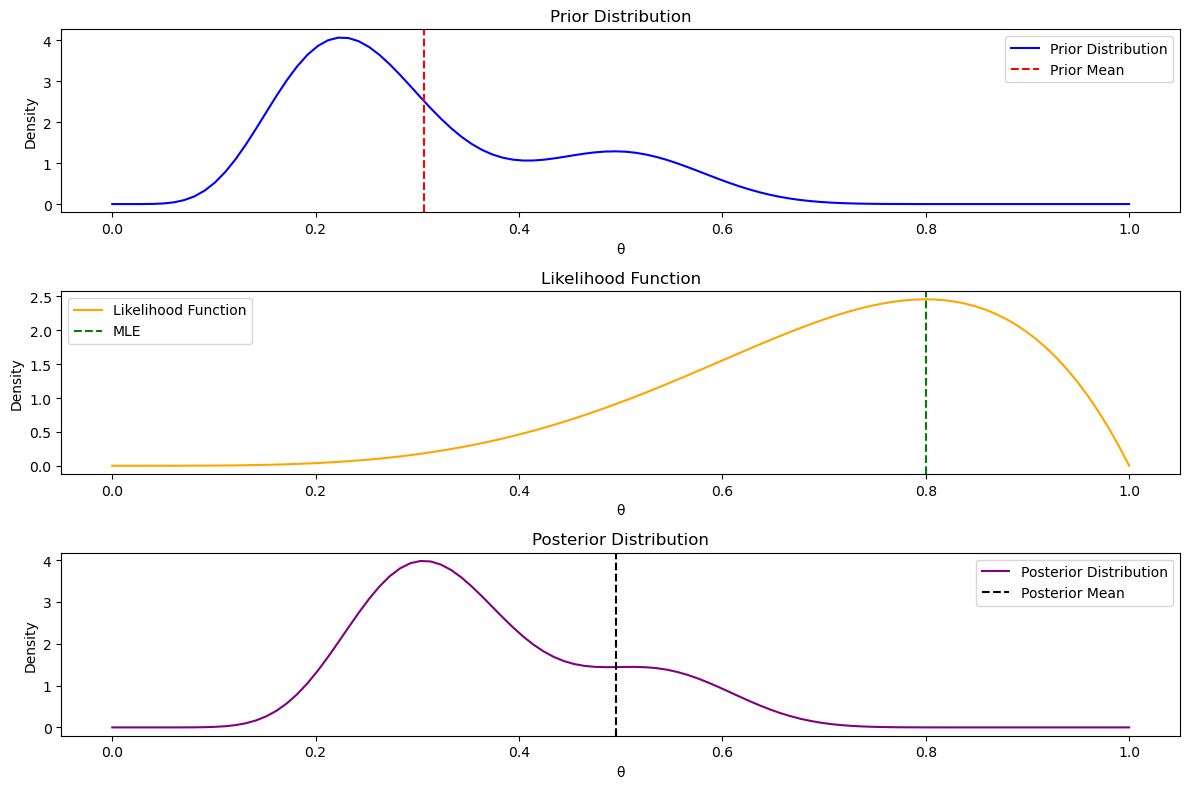

In [4]:
### Implementation of Binomial-Beta Model with Mixture Prior 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
n = 5  # number of trials
k = 3/4  # weight of the first prior
a1, b1 = 8, 25  # parameters for the first beta prior
a2, b2 = 20, 20  # parameters for the second beta prior
y = 4  # number of successes

# Define the range for theta
theta = np.linspace(0, 1, 100)

# Prior densities
prior1 = k * beta.pdf(theta, a1, b1)  # First beta prior
prior2 = (1 - k) * beta.pdf(theta, a2, b2)  # Second beta prior
prior = prior1 + prior2  # Mixture prior

# Likelihood
likelihood = beta.pdf(theta, 1 + y, 1 + n - y)  # Likelihood under the standard uniform prior

# Posterior densities
posterior1 = k * beta.pdf(theta, a1 + y, b1 + n - y)  # Posterior for the first prior
posterior2 = (1 - k) * beta.pdf(theta, a2 + y, b2 + n - y)  # Posterior for the second prior
posterior = posterior1 + posterior2  # Mixture posterior

# Normalize posterior
posterior /= np.trapz(posterior, theta)

# Calculate means
prior_mean = (k * (a1 / (a1 + b1)) + (1 - k) * (a2 / (a2 + b2)))
posterior_mean = (posterior1.mean() + posterior2.mean()) / 2  # Approximate posterior mean
MLE = y / n  # Maximum likelihood estimate

# Plotting
plt.figure(figsize=(12, 8))

# Plot prior
plt.subplot(3, 1, 1)
plt.plot(theta, prior, label='Prior Distribution', color='blue')
plt.title('Prior Distribution')
plt.xlabel('θ')
plt.ylabel('Density')
plt.axvline(prior_mean, color='red', linestyle='--', label='Prior Mean')
plt.legend()

# Plot likelihood
plt.subplot(3, 1, 2)
plt.plot(theta, likelihood, label='Likelihood Function', color='orange')
plt.title('Likelihood Function')
plt.xlabel('θ')
plt.ylabel('Density')
plt.axvline(MLE, color='green', linestyle='--', label='MLE')
plt.legend()

# Plot posterior
plt.subplot(3, 1, 3)
plt.plot(theta, posterior, label='Posterior Distribution', color='purple')
plt.title('Posterior Distribution')
plt.xlabel('θ')
plt.ylabel('Density')
plt.axvline(posterior_mean, color='black', linestyle='--', label='Posterior Mean')
plt.legend()

plt.tight_layout()
plt.show()



### 4 The Jeffreys Prior

The statistician Harold Jeffreys devised a rule for finding a suitable uninformative prior in a wide variety of situations. His idea was to construct a prior that is invariant under reparameterization. For the case of a univariate model parameter $ \theta $, the Jeffreys prior is given by the following equation (also known as Jeffreys’ rule):

$$
f(\theta) \propto I(\theta)
$$

where $ I(\theta) $ is the Fisher information defined by:

$$
I(\theta) = E\left[\left(\frac{\partial \log f(y | \theta)}{\partial \theta}\right)^2 \right] \quad \text{(Note 1)}
$$

If $ \log f(y | \theta) $ is twice differentiable with respect to $ \theta $, and certain regularity conditions hold, then:

$$
I(\theta) = -E\left[\frac{\partial^2 \log f(y | \theta)}{\partial \theta^2}\right] \quad \text{(Note 2)}
$$

The significance of Jeffreys’ rule may be described as follows. Consider a prior given by:

$$
f(\theta) \propto I(\theta)
$$

and the transformed parameter $ \phi = g(\theta) $, where $ g $ is a strictly increasing or decreasing function. Then the prior density for $ \phi $ is given by:

$$
\frac{\partial \theta}{\partial \phi} f(\phi) \propto f(\theta)
$$

Using the transformation rule:

$$
\frac{\partial \theta}{\partial \phi} \propto I(\theta) \quad \Rightarrow \quad I(\theta) = E\left[\left(\frac{\partial \log f(y | \theta)}{\partial \theta}\right)^2\right]
$$

This implies:

$$
\frac{\partial \theta}{\partial \phi} I(\theta) \propto E\left[\left(\frac{\partial \log f(y | \phi)}{\partial \phi}\right)^2\right] = I(\phi)
$$

Thus, Jeffreys’ rule is ‘invariant under reparameterization’, in the sense that if a prior is constructed according to $ f(\theta) \propto I(\theta) $, then, for another parameter $ \phi = g(\theta) $, it is also true that:

$$
f(\phi) \propto I(\phi)
$$

This means that the Jeffreys prior provides a consistent and invariant prior choice across different parameterizations.


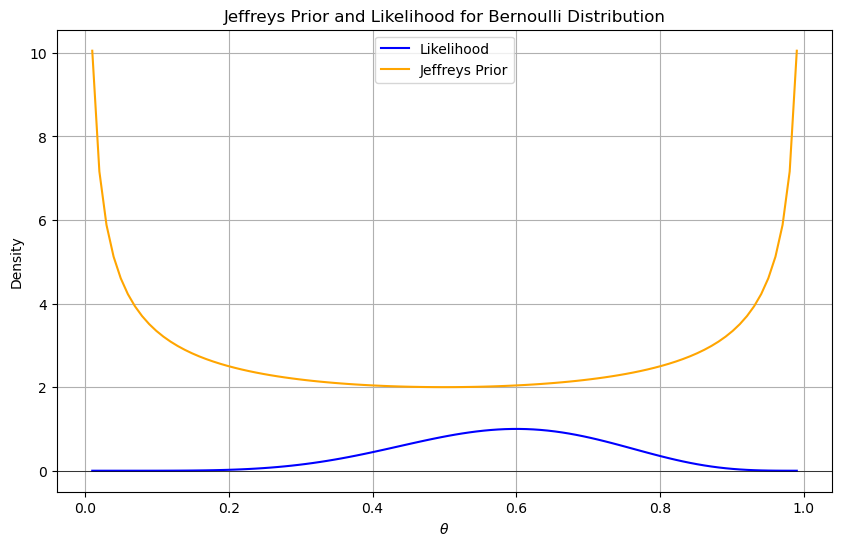

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 1. Define the likelihood function for a Bernoulli distribution
def likelihood(y, n, theta):
    return theta**y * (1 - theta)**(n - y)

# 2. Compute Fisher Information for the Bernoulli model
def fisher_information(theta):
    return 1 / (theta * (1 - theta))

# 3. Define the Jeffreys prior based on the Fisher Information
def jeffreys_prior(theta):
    return np.sqrt(fisher_information(theta))

# 4. Generate theta values
theta_values = np.linspace(0.01, 0.99, 100)
n = 10  # Number of trials
y = 6   # Number of successes

# Calculate likelihood, Jeffreys prior, and posterior
likelihood_values = likelihood(y, n, theta_values)
jeffreys_prior_values = jeffreys_prior(theta_values)

# Normalize likelihood for visualization
likelihood_values /= np.max(likelihood_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(theta_values, likelihood_values, label='Likelihood', color='blue')
plt.plot(theta_values, jeffreys_prior_values, label='Jeffreys Prior', color='orange')
plt.title('Jeffreys Prior and Likelihood for Bernoulli Distribution')
plt.xlabel('$\\theta$')
plt.ylabel('Density')
plt.axhline(0, color='black', lw=0.5)
plt.legend()
plt.grid()
plt.show()


## Exercise 4: Jeffreys Prior for the Normal-Normal Model

Find the Jeffreys prior for $ \mu $ if $ (y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2) $, where $ \sigma $ is known.

### Solution to Exercise 4

The likelihood function is given by:

$$
f(y | \mu) \propto \prod_{i=1}^{n} \exp\left\{-\frac{1}{2\sigma^2}(y_i - \mu)^2\right\} = \exp\left\{-\frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2\right\}
$$

Taking the logarithm of the likelihood, we have:

$$
\log f(y | \mu) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \mu)^2 + c \quad \text{(where \( c \) is a constant)}
$$

### First Derivative

Calculating the first derivative with respect to $ \mu $:

$$
\frac{\partial}{\partial \mu} \log f(y | \mu) = -\frac{1}{2\sigma^2} \cdot 2 \sum_{i=1}^{n} (y_i - \mu)(-1) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (y_i - \mu)
$$

### Second Derivative

Calculating the second derivative with respect to $ \mu $:

$$
\frac{\partial^2}{\partial \mu^2} \log f(y | \mu) = -\frac{1}{2\sigma^2} \cdot 2n = -\frac{n}{\sigma^2}
$$

### Fisher Information

The Fisher information $ I(\mu) $ is given by:

$$
I(\mu) = E\left[-\frac{\partial^2}{\partial \mu^2} \log f(y | \mu)\right] = \frac{n}{\sigma^2}
$$

### Jeffreys Prior

Thus, the Jeffreys prior is:

$$
f(\mu) \propto I(\mu) \propto 1, \quad \mu \in \mathbb{R}
$$

#### Note 1:
This is the same prior as used earlier in the uninformative case.

#### Note 2:
The Fisher information can also be derived as follows:

$$
I(\mu) = -E\left[\frac{\partial^2}{\partial \mu^2} \log f(y | \mu)\right] = -E\left[-\frac{n}{\sigma^2}\right] = \frac{n}{\sigma^2}
$$


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

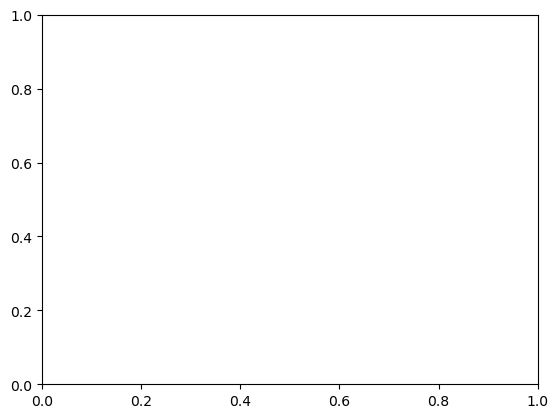

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1  # known sigma
n = 100    # sample size

# Generate some sample data from a normal distribution
np.random.seed(0)
mu_true = 5
y = np.random.normal(mu_true, sigma, n)

# Function to calculate the log-likelihood
def log_likelihood(mu, y, sigma):
    n = len(y)
    return -n / (2 * sigma**2) * np.sum((y - mu)**2)

# Function to calculate the Fisher information
def fisher_information(y, sigma):
    n = len(y)
    return n / sigma**2

# Function to calculate the Jeffreys prior (which is constant in this case)
def jeffreys_prior(mu, fisher_info):
    # Since fisher_info is constant, Jeffreys prior is proportional to 1
    return 1

# Estimate the Fisher information for the generated data
fisher_info = fisher_information(y, sigma)

# Range of mu values to plot the prior
mu_values = np.linspace(-10, 15, 1000)
jeffreys_prior_values = jeffreys_prior(mu_values, fisher_info)

# Plotting the Jeffreys prior (constant line)
plt.plot(mu_values, jeffreys_prior_values, label='Jeffreys Prior (Constant)', color='blue')
plt.axvline(mu_true, color='red', linestyle='--', label=f'True Mean: {mu_true}')
plt.title("Jeffreys Prior for Normal-Normal Model")
plt.xlabel("Mu")
plt.ylabel("Prior Density")
plt.legend()
plt.grid(True)
plt.show()


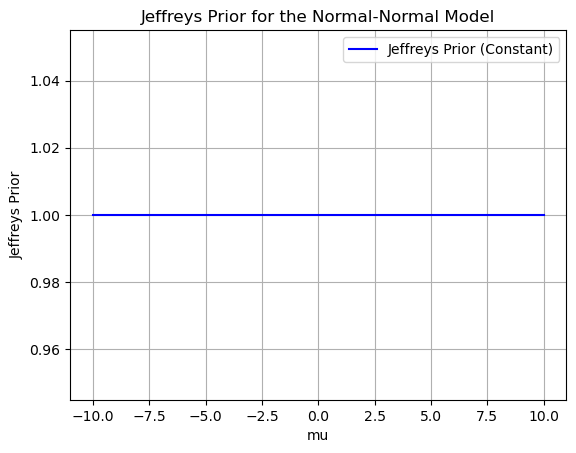

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of mu values (for example, from -10 to 10)
mu_values = np.linspace(-10, 10, 1000)

# Compute Jeffreys prior values (for normal-normal model, it's a constant prior)
# Since the Jeffreys prior is constant in this case, we'll just create a constant array
jeffreys_prior_values = np.ones_like(mu_values)  # Creates an array of ones with the same shape as mu_values

# Plot the result
plt.plot(mu_values, jeffreys_prior_values, label='Jeffreys Prior (Constant)', color='blue')
plt.xlabel('mu')
plt.ylabel('Jeffreys Prior')
plt.title('Jeffreys Prior for the Normal-Normal Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!!!! Correct above ( Take it as exercise)

## Exercise 5 Jeffreys prior for the normal-gamma model

Find the Jeffreys prior for $ \lambda $ if $ ( y_1 , \dots , y_n | \lambda ) \sim \text{iid} \ N (\mu, 1/\lambda) $, where $ \mu $ is known.

### Solution to Exercise 5

$$
f(y | \lambda) \propto \prod_{i=1}^{n} \lambda^{1/2} \exp\left(-\frac{\lambda}{2}(y_i - \mu)^2\right) = \lambda^{n/2} \exp\left(-\frac{\lambda}{2}\sum_{i=1}^{n}(y_i - \mu)^2\right)
$$

$$
\log f(y | \lambda) = \frac{n}{2} \log \lambda - \frac{\lambda}{2} \sum_{i=1}^{n}(y_i - \mu)^2 + c \quad \text{(where c is a constant)}
$$

$$
\frac{\partial \log f(y | \lambda)}{\partial \lambda} = \frac{n}{2\lambda} - \frac{1}{2} \sum_{i=1}^{n}(y_i - \mu)^2
$$

$$
\frac{\partial^2 \log f(y | \lambda)}{\partial \lambda^2} = -\frac{n}{2\lambda^2}
$$

So, the Fisher information is:

$$
I(\lambda) = -\mathbb{E}\left[\frac{\partial^2 \log f(y | \lambda)}{\partial \lambda^2} \right] = -\mathbb{E}\left(-\frac{n}{2\lambda^2}\right) = \frac{n}{2\lambda^2}
$$

Thus, the Jeffreys prior is proportional to:

$$
f(\lambda) \propto I(\lambda)^{1/2} = \frac{1}{\lambda}
$$

where $ \lambda \in \mathbb{R}^+ $.

### Notes:

1. This is the same prior as used earlier in the uninformative case.
2. Another way to obtain the Fisher information is to first express it in terms of the second derivative of the log-likelihood.


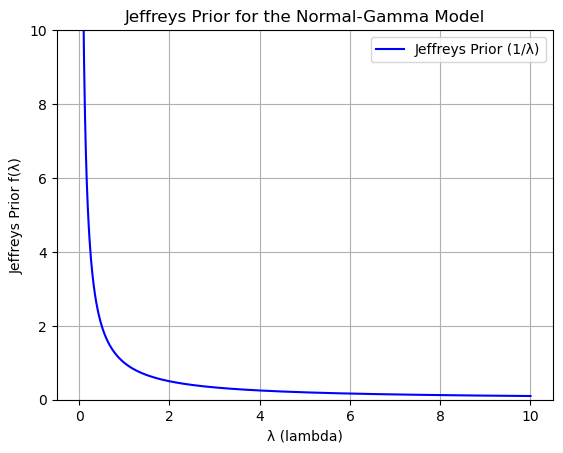

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to compute the Jeffreys prior for the normal-gamma model
def jeffreys_prior(lambda_values):
    """
    Computes the Jeffreys prior for lambda given that (y1, ..., yn | lambda) ~ iid N(mu, 1/lambda).
    Since the Jeffreys prior is proportional to 1/lambda, we return the prior values.
    
    Parameters:
    lambda_values : array-like
        Array of lambda values for which to compute the prior.
    
    Returns:
    array-like
        Jeffreys prior values for the input lambda values.
    """
    return 1 / lambda_values

# Generate an array of lambda values for plotting
lambda_values = np.linspace(0.01, 10, 1000)  # Avoid lambda = 0 to prevent division by zero

# Compute the Jeffreys prior values
jeffreys_prior_values = jeffreys_prior(lambda_values)

# Plot the Jeffreys prior
plt.plot(lambda_values, jeffreys_prior_values, label="Jeffreys Prior (1/λ)", color='blue')
plt.title("Jeffreys Prior for the Normal-Gamma Model")
plt.xlabel("λ (lambda)")
plt.ylabel("Jeffreys Prior f(λ)")
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


## Exercise 6 Jeffreys Prior for the Binomial-Beta Model

Find the Jeffreys prior for $ \theta $ if $ ( y | \theta ) \sim \text{Binomial}(n, \theta) $, where $ n $ is known.

### Solution to Exercise 6

The likelihood function is given by:

$$
f(y | \theta) = \binom{n}{y} \theta^y (1 - \theta)^{n - y}
$$

Taking the logarithm of the likelihood function:

$$
\log f(y | \theta) = \log \binom{n}{y} + y \log \theta + (n - y) \log(1 - \theta)
$$

Calculating the first derivative with respect to \( \theta \):

$$
\frac{\partial \log f(y | \theta)}{\partial \theta} = \frac{y}{\theta} - \frac{n - y}{1 - \theta}
$$

Calculating the second derivative:

$$
\frac{\partial^2 \log f(y | \theta)}{\partial \theta^2} = -\frac{y}{\theta^2} - \frac{n - y}{(1 - \theta)^2}
$$

Now, we can find the Fisher information:

$$
I(\theta) = -\mathbb{E}\left[\frac{\partial^2 \log f(y | \theta)}{\partial \theta^2}\right] = \mathbb{E}\left[\frac{n \theta}{\theta^2} + \frac{n(1 - \theta)}{(1 - \theta)^2}\right]
$$

This simplifies to:

$$
I(\theta) = n \left(\frac{1}{\theta} + \frac{1}{1 - \theta}\right) = \frac{n}{\theta(1 - \theta)}
$$

Thus, the Jeffreys prior is given by:

$$
f(\theta) \propto I(\theta)^{1/2} = \frac{1}{\theta^{1/2}(1 - \theta)^{1/2}}, \quad 0 < \theta < 1
$$

### Notes

We may also write the Jeffreys prior density as:

$$
f(\theta) \propto \theta^{-1/2}(1 - \theta)^{-1/2}, \quad 0 < \theta < 1
$$

Thus, the Jeffreys prior can be specified by writing $ \theta \sim \text{Beta}(\alpha, \beta) $ with $ \alpha = \beta = \frac{1}{2} $.

We see that the Jeffreys prior may be thought of as "half-way" between:
- the Bayes prior, defined by $ \alpha = \beta = 1 $
- the Haldane prior, defined by $ \alpha = \beta = 0 $


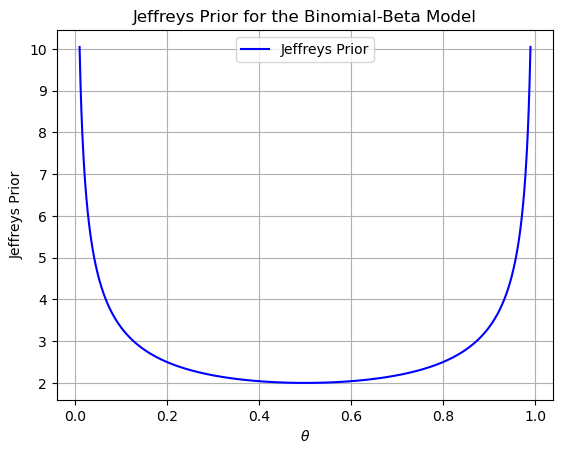

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Jeffreys prior function for theta
def jeffreys_prior(theta):
    return 1 / (np.sqrt(theta * (1 - theta)))

# Generate theta values between 0 and 1
theta_values = np.linspace(0.01, 0.99, 1000)

# Calculate the Jeffreys prior for each theta value
jeffreys_prior_values = jeffreys_prior(theta_values)

# Plot the Jeffreys prior
plt.plot(theta_values, jeffreys_prior_values, label="Jeffreys Prior", color='blue')
plt.xlabel(r'$\theta$')
plt.ylabel(r'Jeffreys Prior')
plt.title('Jeffreys Prior for the Binomial-Beta Model')
plt.legend()
plt.grid(True)
plt.show()


## Exercise 7 Jeffreys prior for the tramcar problem

Recall the discussion of the tramcar problem following Exercise 6, in relation to the model $ ( y | \theta ) \sim \text{DU}(1,\ldots,\theta) $. 

### Solution to Exercise 7

Here, the likelihood is given by:

$$
f(y | \theta) = \frac{1}{\theta} \quad \Rightarrow \quad \log f(y | \theta) = -\log \theta
$$

Calculating the first derivative:

$$
\frac{\partial \log f(y | \theta)}{\partial \theta} = -\frac{1}{\theta}
$$

Calculating the second derivative:

$$
\frac{\partial^2 \log f(y | \theta)}{\partial \theta^2} = \frac{1}{\theta^2}
$$

Thus, the Fisher information is:

$$
I(\theta) = E\left[\frac{\partial^2 \log f(y | \theta)}{\partial \theta^2}\right] = \frac{1}{\theta^2}
$$

It follows that the Jeffreys prior for \( \theta \) is given by:

$$
f(\theta) \propto I(\theta) \propto \frac{1}{\theta}, \quad \theta = 1, 2, 3, \ldots
$$
